#🪙 Gold Price Prediction Using Machine Learning

This notebook is a beginner-level Machine Learning project where I predict gold prices using regression techniques. It's part of my ML learning journey and covers data preprocessing, exploratory data analysis (EDA), model training, and evaluation.

---


## 📦 Step 1: Importing Libraries

We import essential libraries like NumPy, pandas, matplotlib, seaborn, and sklearn for data handling, visualization, and modeling.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Step 2: Loading the Dataset

We load the dataset containing gold price and other relevant features, and make a copy to ensure we don’t mess up the original.


In [3]:
df=pd.read_csv("/content/gld_price_data.csv")

In [4]:
dff=df.copy()

In [5]:
dff.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


## 🔍 Step 2: Checking for Missing Values

We check if the dataset contains any missing values that need to be handled.


In [6]:
dff.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


## 📊 Step 3: Exploratory Data Analysis (EDA)

We visualize the distribution of each numeric feature using histograms and boxplots to detect skewness and outliers.


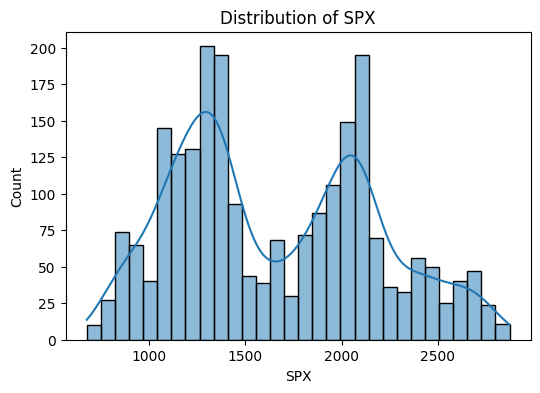

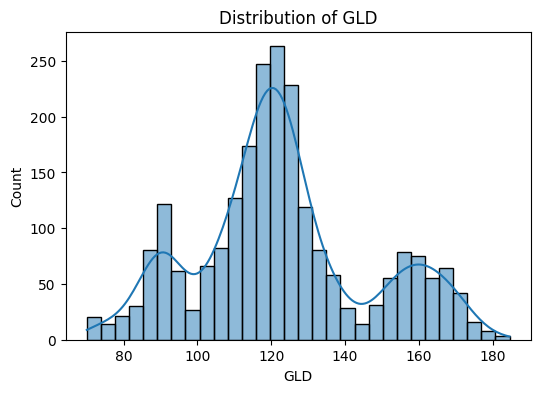

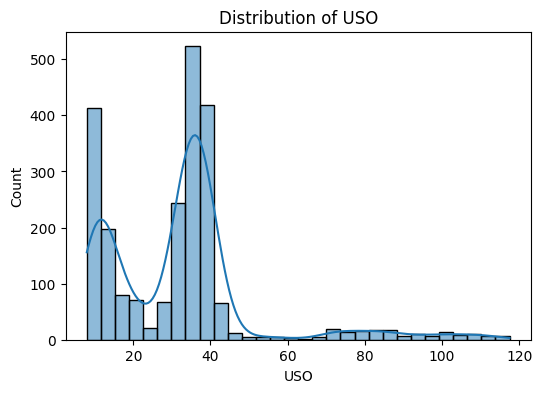

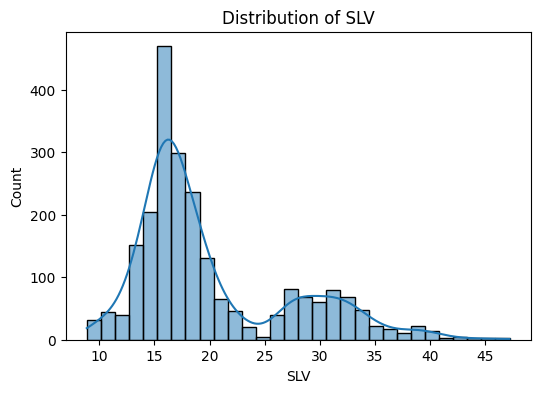

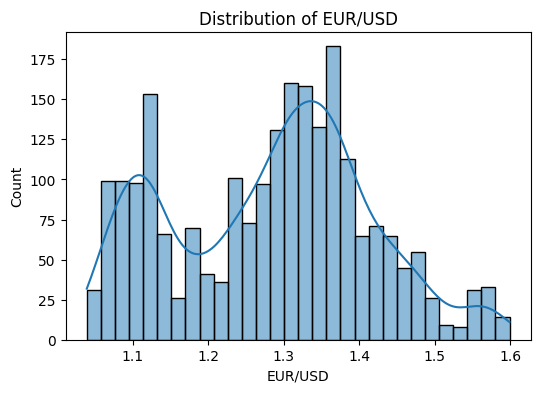

In [7]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(6,4))
  sns.histplot(data=dff,x=col,bins=30,kde=True)
  plt.title(f'Distribution of {col}')
  plt.show

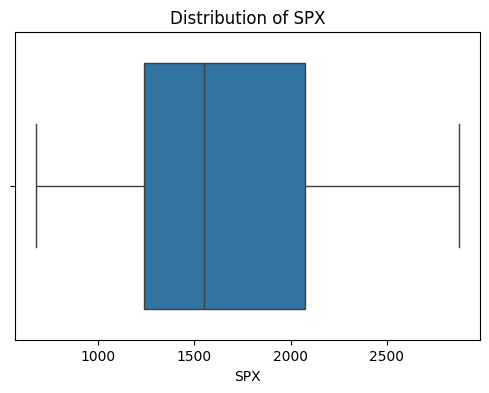

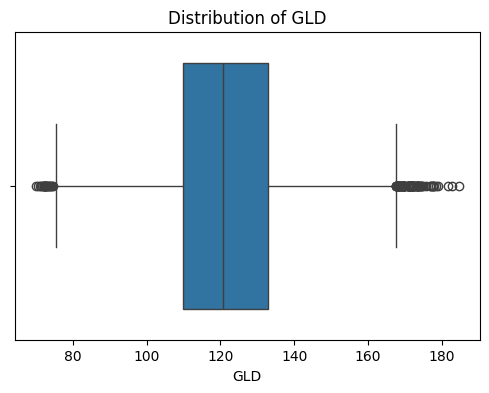

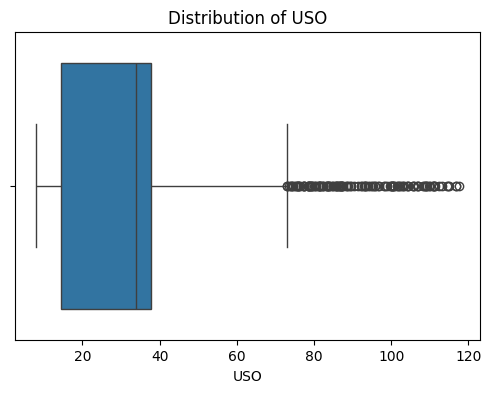

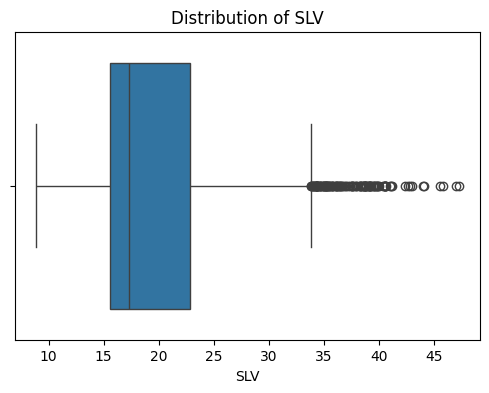

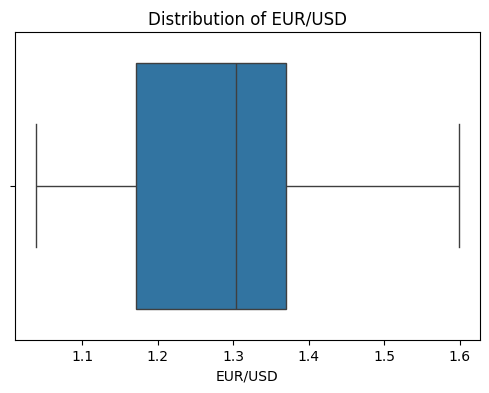

In [8]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=dff,x=col)
  plt.title(f'Distribution of {col}')
  plt.show

## 🧽 Step 4: Outlier Treatment

We use IQR  method to cap extreme outliers in GLD, SLV, and USO columns.


In [15]:
Q1=dff["GLD"].quantile(0.25)
Q3=dff["GLD"].quantile(0.75)
IQR=Q3-Q1
uplim=Q3+1.5*IQR
lowlim=Q3-1.5*IQR
dff['GLD']=np.where(dff['GLD']>uplim,uplim,np.where(dff['GLD']<lowlim,lowlim,dff['GLD']))

In [17]:
Q1=dff["SLV"].quantile(0.25)
Q3=dff["SLV"].quantile(0.75)
IQR=Q3-Q1
uplim=Q3+1.5*IQR
lowlim=Q3-1.5*IQR
dff['SLV']=np.where(dff['SLV']>uplim,uplim,np.where(dff['SLV']<lowlim,lowlim,dff['SLV']))

In [18]:
Q1=dff["USO"].quantile(0.25)
Q3=dff["USO"].quantile(0.75)
IQR=Q3-Q1
uplim=Q3+1.5*IQR
lowlim=Q3-1.5*IQR
dff['USO']=np.where(dff['USO']>uplim,uplim,np.where(dff['USO']<lowlim,lowlim,dff['USO']))

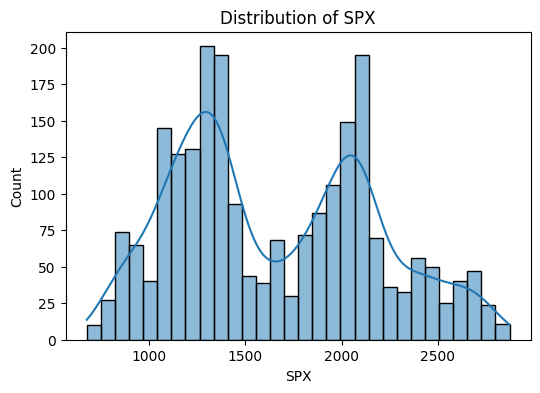

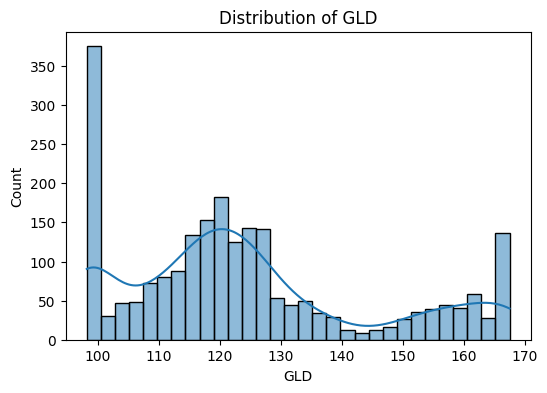

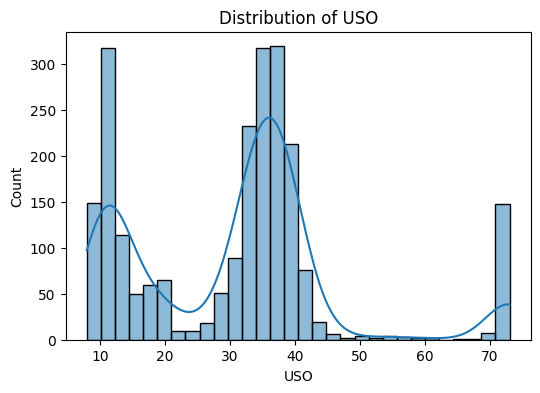

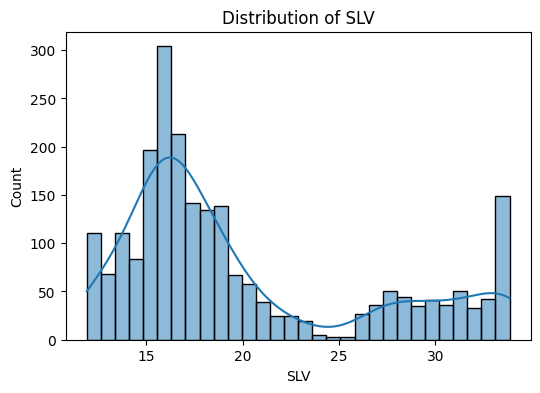

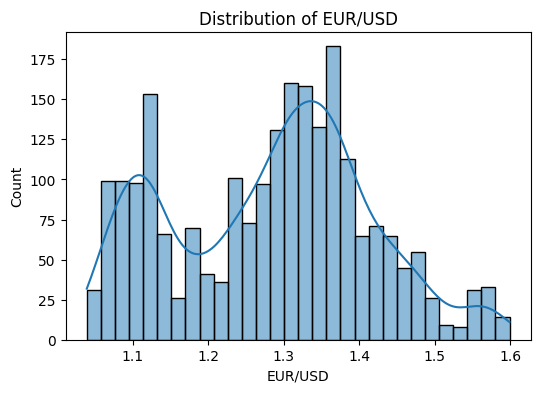

In [22]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(6,4))
  sns.histplot(data=dff,x=col,bins=30,kde=True)
  plt.title(f'Distribution of {col}')
  plt.show

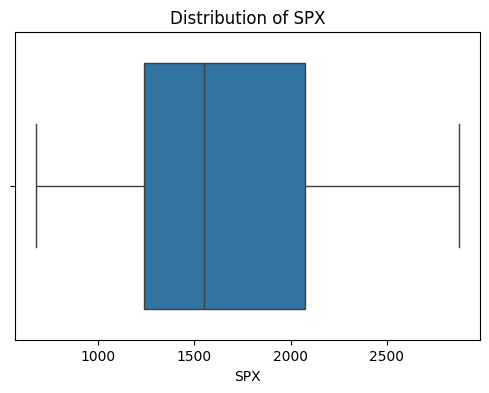

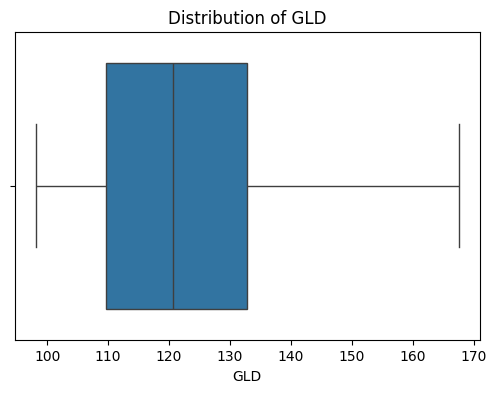

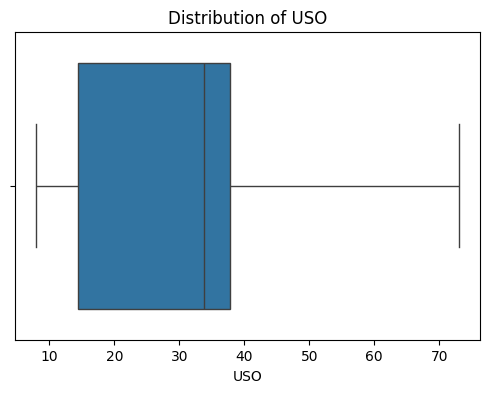

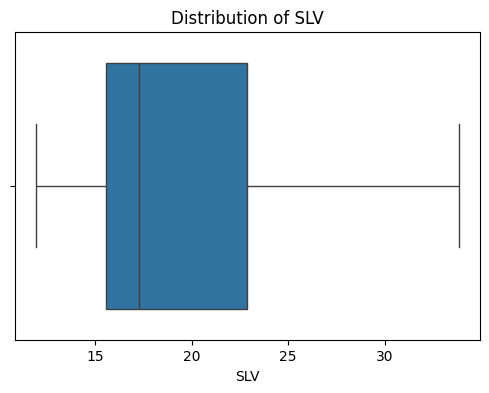

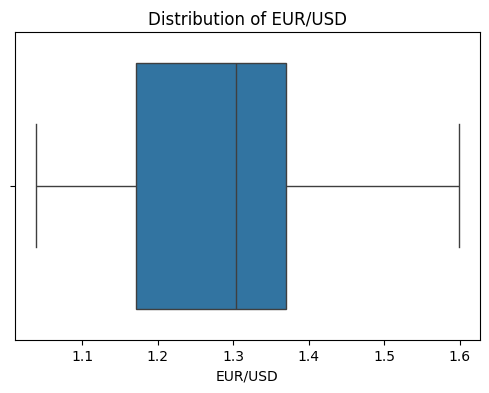

In [23]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=dff,x=col)
  plt.title(f'Distribution of {col}')
  plt.show

## 🧾 Step 5: Feature Selection

We drop the 'Date' and 'GLD' columns to define X and y.  
- `X` = input features  
- `y` = target (GLD)


In [25]:
X=dff.drop(columns=['Date','GLD'])
y=dff['GLD']

In [26]:
from sklearn.model_selection import train_test_split

## ✂️ Step 6: Train-Test Split

We split the dataset into training and testing sets with 80-20 ratio.


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

## 🤖 Step 8: Model Training - Linear Regression

We train a Linear Regression model using the scaled data.


In [35]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.9154421654365668

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

lr.fit(X_train, y_train)
print("Train R2:", lr.score(X_train, y_train))
print("Test R2:", lr.score(X_test, y_test))


Train R2: 0.8973237467615074
Test R2: 0.9063865112799934


In [54]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print(r2_score(y_test, y_pred))


0.9154421654365668


### 📏 Model Evaluation Metrics

Apart from the R² score, it's important to evaluate a regression model using other metrics that capture average error and variance in predictions.

Here, we calculate:

- **MAE (Mean Absolute Error):** Average absolute difference between actual and predicted values.
- **RMSE (Root Mean Squared Error):** Similar to MAE but penalizes larger errors more heavily.

These metrics help us understand the reliability and stability of the model's predictions.


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


MAE: 4.666139284194364
RMSE: 5.995205554472481


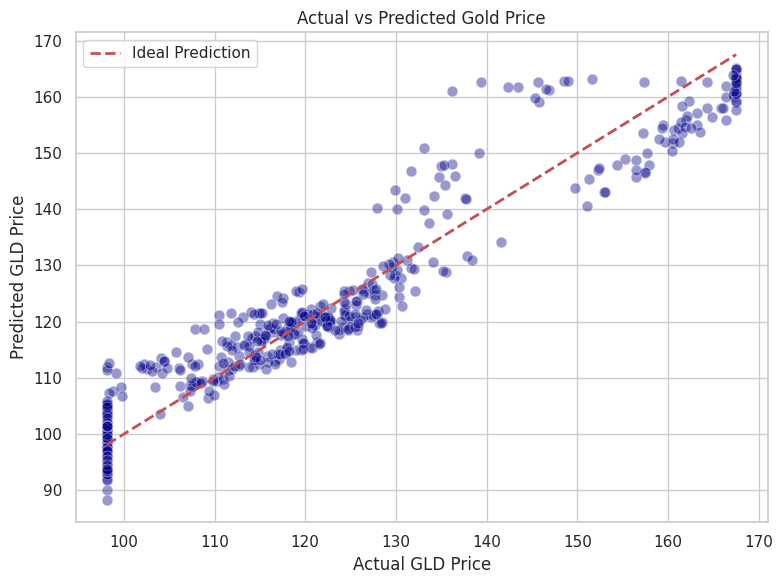

In [57]:

plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, s=60, color="darkblue", edgecolor="w")

# Plot ideal line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')

plt.xlabel("Actual GLD Price")
plt.ylabel("Predicted GLD Price")
plt.title("Actual vs Predicted Gold Price")
plt.legend()
plt.tight_layout()
plt.show()


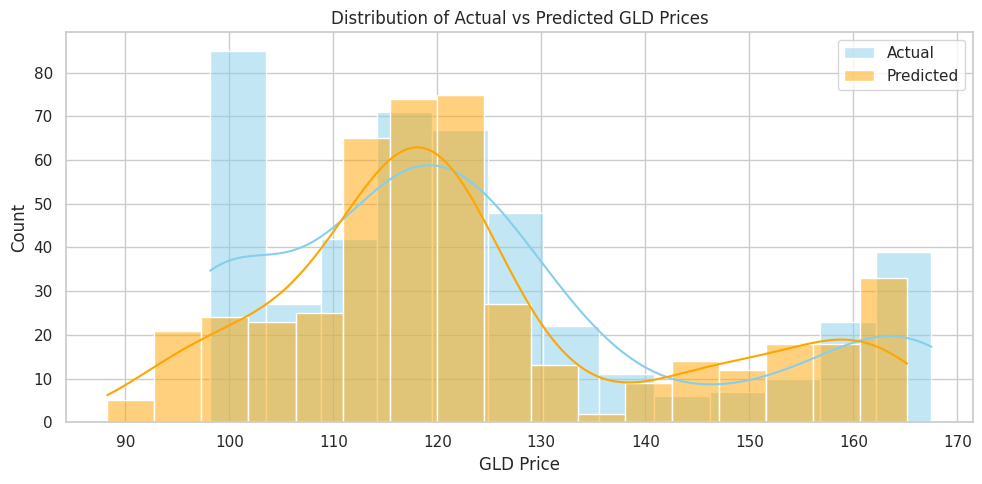

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(y_test, color='skyblue', label='Actual', kde=True)
sns.histplot(y_pred, color='orange', label='Predicted', kde=True)
plt.title("Distribution of Actual vs Predicted GLD Prices")
plt.xlabel("GLD Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-59-1692063999.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="Actual", shade=True, color="green")
/tmp/ipython-input-59-1692063999.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted", shade=True, color="blue")


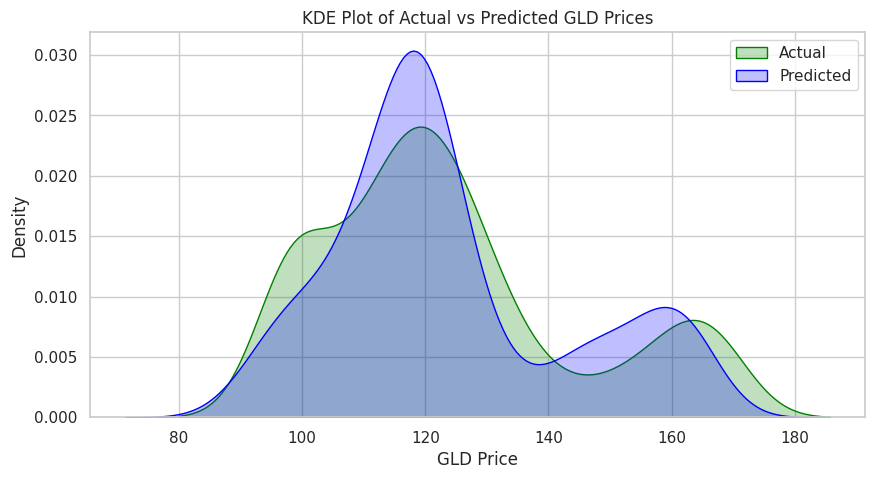

In [59]:
plt.figure(figsize=(10,5))
sns.kdeplot(y_test, label="Actual", shade=True, color="green")
sns.kdeplot(y_pred, label="Predicted", shade=True, color="blue")
plt.title("KDE Plot of Actual vs Predicted GLD Prices")
plt.xlabel("GLD Price")
plt.legend()
plt.show()


## ✅ Final Conclusion

- ✅ Final Model: **Linear Regression**
- ✅ Preprocessing: **IQR-based outlier capping**, no scaling required
- ✅ Performance: **R² Score = 91.5%**
- ✅ Visuals: Actual vs Predicted Scatter, KDE, Histogram for full comparison

### 🚀 Next Steps:
- Try **XGBoost or Random Forest** for boosting accuracy
- Experiment with **feature engineering**
- Deploy this as a web app using **Streamlit** or **Gradio**

---
Made with ❤️ by Rudra Pratap Singh  
*On a mission to teach machines to predict gold better than astrologers 😄💸*


Now we will look into this model again after fixing the date column

In [63]:
dff['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2290 entries, 0 to 2289
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
2290 non-null   object
dtypes: object(1)
memory usage: 18.0+ KB


In [64]:
dff['Date']=pd.to_datetime(dff['Date'])

In [67]:
dff['Year']=dff['Date'].dt.year
dff['Month']=dff['Date'].dt.month
dff['Day']=dff['Date'].dt.day

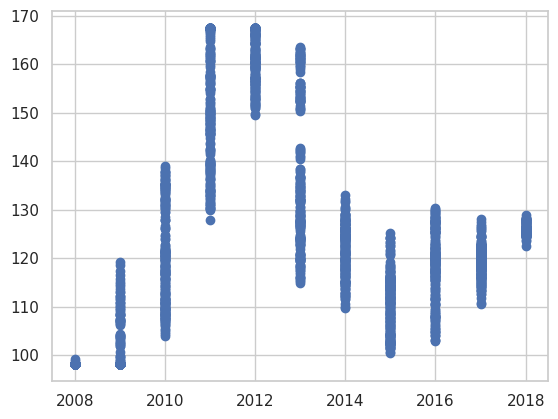

In [69]:
plt.scatter(x=dff['Year'],y=dff['GLD'])

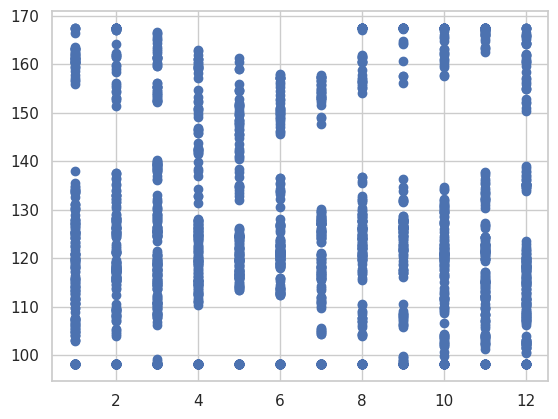

In [71]:
plt.scatter(x=dff['Month'],y=dff['GLD'])

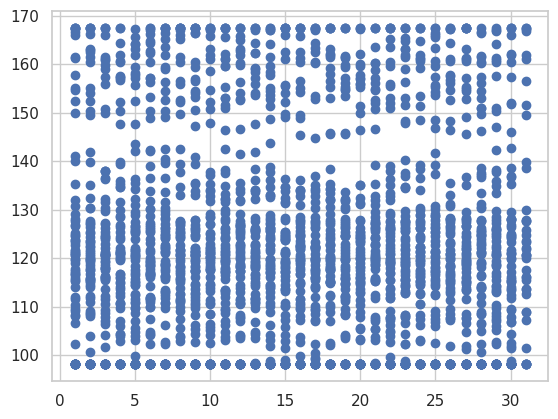

In [70]:
plt.scatter(x=dff['Day'],y=dff['GLD'])

In [72]:
dff.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
0,2008-01-02,1447.160034,98.167498,72.998754,15.180,1.471692,2008,1,2
1,2008-01-03,1447.160034,98.167498,72.998754,15.285,1.474491,2008,1,3
2,2008-01-04,1411.630005,98.167498,72.998754,15.167,1.475492,2008,1,4
3,2008-01-07,1416.180054,98.167498,72.998754,15.053,1.468299,2008,1,7
4,2008-01-08,1390.189941,98.167498,72.998754,15.590,1.557099,2008,1,8


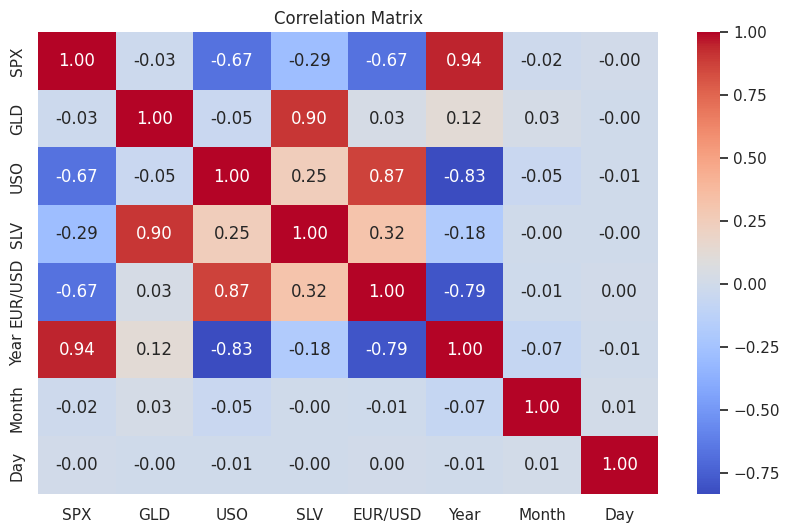

In [74]:
corr_matrix = dff.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [91]:
X2=dff.drop(columns=['Date','GLD'])
y2=dff['GLD']

In [92]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=42)


In [93]:
model=LinearRegression()
model.fit(X2_train,y2_train)
y2_pred=model.predict(X2_test)
r2=r2_score(y2_test,y2_pred)
print("R2 score: ", r2)

R2 score:  0.931481949482077


In [94]:
print("MAE:", mean_absolute_error(y2_test, y2_pred))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred)))

MAE: 4.260768006867045
RMSE: 5.396717076789207


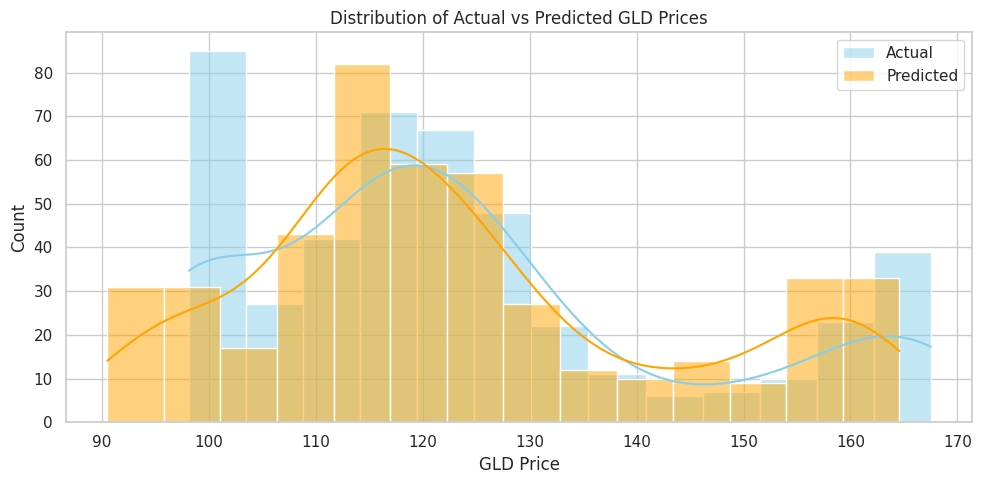

In [95]:
plt.figure(figsize=(10,5))
sns.histplot(y2_test, color='skyblue', label='Actual', kde=True)
sns.histplot(y2_pred, color='orange', label='Predicted', kde=True)
plt.title("Distribution of Actual vs Predicted GLD Prices")
plt.xlabel("GLD Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-96-732608799.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y2_test, label="Actual", shade=True, color="green")
/tmp/ipython-input-96-732608799.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y2_pred, label="Predicted", shade=True, color="blue")


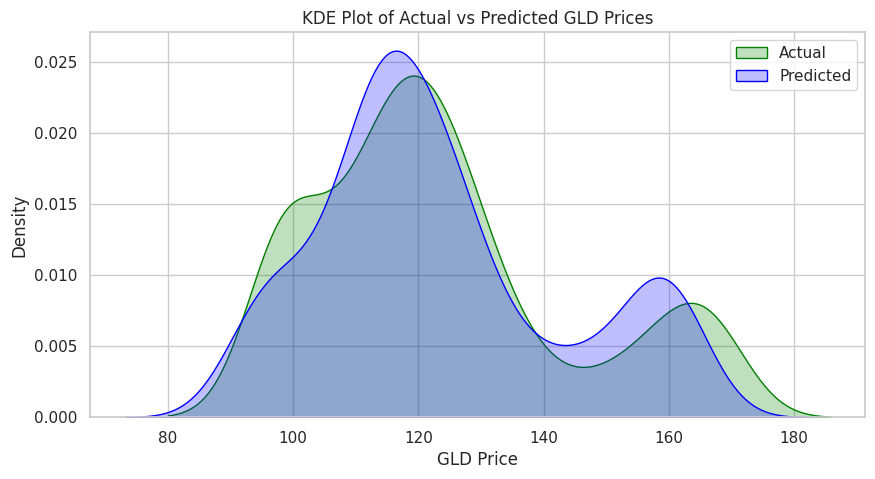

In [96]:
plt.figure(figsize=(10,5))
sns.kdeplot(y2_test, label="Actual", shade=True, color="green")
sns.kdeplot(y2_pred, label="Predicted", shade=True, color="blue")
plt.title("KDE Plot of Actual vs Predicted GLD Prices")
plt.xlabel("GLD Price")
plt.legend()
plt.show()


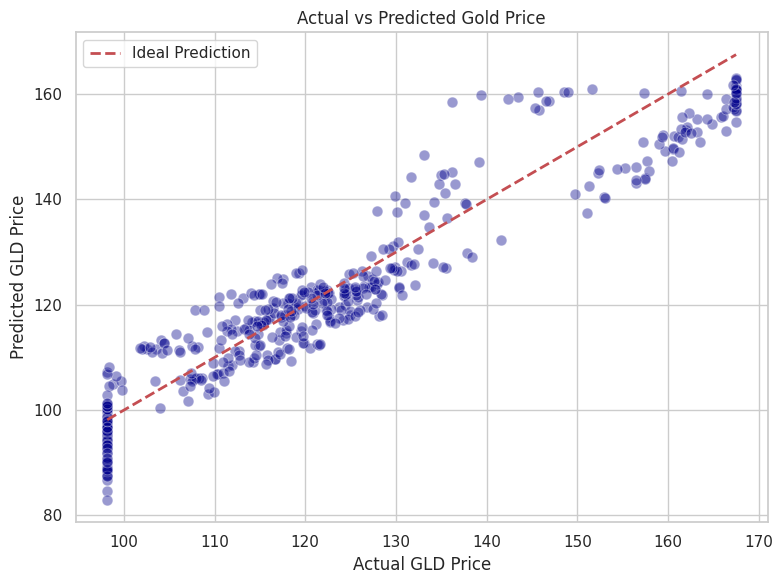

In [97]:

plt.figure(figsize=(8,6))
sns.set(style="whitegrid")

sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, s=60, color="darkblue", edgecolor="w")

# Plot ideal line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction')

plt.xlabel("Actual GLD Price")
plt.ylabel("Predicted GLD Price")
plt.title("Actual vs Predicted Gold Price")
plt.legend()
plt.tight_layout()
plt.show()


## ✅ Final Conclusion

- ✅ Final Model: **Linear Regression**
- ✅ Preprocessing: **IQR-based outlier capping**, no scaling required, handling the Date column
- ✅ Performance: **R² Score = 93.1%**
- ✅ Visuals: Actual vs Predicted Scatter, KDE, Histogram for full comparison

### 🚀 Next Steps:
- Try **XGBoost or Random Forest** for boosting accuracy
- Deploy this as a web app using **Streamlit** or **Gradio**

---
Made with ❤️ by Rudra Pratap Singh  
*On a mission to teach machines to predict gold better than astrologers 😄💸*